In [189]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [190]:
data = pd.read_csv('D:/Users/theo/Downloads/GroceriesInitial.csv')

In [191]:
data.head()

,id,basket_value,recency_days,Item_1,Item_2,Item_3,Item_4,Item_5,Item_6,Item_7,...,Item_23,Item_24,Item_25,Item_26,Item_27,Item_28,Item_29,Item_30,Item_31,Item_32
0,1,1.1,2,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,3.6,31,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1.2,7,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,6.6,7,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2.5,66,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [192]:
data.shape

(7536, 35)

In order to get the products of interest and avoid having NaN values, we are going to alter the dataframe, keeping the first three rows as they are and then by adding one column for each product of interest. In each transaction, there is going to be a set of 1s and 0s, with 1 representing the presence of given product and 0 the absence of it.

In [193]:
selected_products = ["citrus fruit", "tropical fruit", "whole milk", "other vegetables", "rolls/buns", "chocolate", "bottled water", "yogurt", "sausage", "root vegetables", "pastry", "soda", "cream"]
product_names = [x for x in selected_products if str(x) != 'nan']

new_data = pd.DataFrame(columns=['id', 'basket_value', 'recency_days'] + product_names)

for i, row in data.iterrows():
    new_row = {'id': row['id'], 'basket_value': row['basket_value'], 'recency_days': row['recency_days']}
    for product_name in product_names:
        new_row[product_name] = int(product_name in row.values)
    new_data = pd.concat([new_data, pd.DataFrame(new_row, index=[0])], ignore_index=True)

In [194]:
new_data = new_data[~(new_data.iloc[:, 2:] == 0).all(axis=1)]
new_data_num_value = new_data
new_data_num_value.drop(columns=['id'], axis=0)
new_data_num_value = new_data_num_value[~(new_data_num_value.iloc[:, 2:] == 0).all(axis=1)]

In [195]:
new_data_num_value

,id,basket_value,recency_days,citrus fruit,tropical fruit,whole milk,other vegetables,rolls/buns,chocolate,bottled water,yogurt,sausage,root vegetables,pastry,soda,cream
0,1,1.1,2,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2,3.6,31,0,1,0,0,0,0,0,1,0,0,0,0,0
2,3,1.2,7,0,0,1,0,0,0,0,0,0,0,0,0,0
3,4,6.6,7,0,0,0,0,0,0,0,1,0,0,0,0,0
4,5,2.5,66,0,0,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7531,9831,17.0,26,1,0,1,0,0,1,0,0,1,1,0,0,0
7532,9832,3.1,28,0,0,0,0,0,0,0,0,0,0,0,0,0
7533,9833,6.1,3,1,0,0,1,1,0,0,1,0,0,0,0,0
7534,9834,3.1,31,0,0,0,0,0,0,1,0,0,0,0,1,0


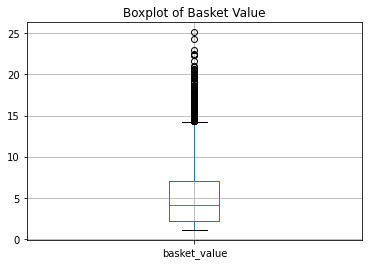

In [196]:
new_data.boxplot(column=['basket_value'])

plt.title("Boxplot of Basket Value")
plt.show()

In [197]:
median_BV = new_data['basket_value'].median()
mean_BV = new_data['basket_value'].mean()
std_BV = new_data['basket_value'].std()
min_BV = new_data['basket_value'].min()
max_BV = new_data['basket_value'].max()
q33_BV = new_data['basket_value'].quantile(0.33)
q67_BV = new_data['basket_value'].quantile(0.67)

print("Median of column BV: ", median_BV)
print("Mean of column BV: ", mean_BV)
print("Standard deviation of column BV: ", std_BV)
print("Minimum of column BV: ", min_BV)
print("Maximum of column BV: ", max_BV)
print("33th percentile of column BV: ", q33_BV)
print("67th percentile of column BV: ", q67_BV)

Median of column BV:  4.1
Mean of column BV:  5.0365843949043985
Standard deviation of column BV:  3.6920881294264087
Minimum of column BV:  1.1
Maximum of column BV:  25.1
33th percentile of column BV:  2.7
67th percentile of column BV:  6.0


In [198]:
for i, row in new_data.iterrows():
    if row['basket_value'] <= q33_BV:
        new_data.loc[i, 'basket_value'] = 'low'
    elif row['basket_value'] <= q67_BV:
        new_data.loc[i, 'basket_value'] = 'medium'
    else:
        new_data.loc[i, 'basket_value'] = 'high'

In [199]:
new_data = new_data.drop(columns=['id'], axis=0)

For analyzing purposes, basket value had to be represented categorically, spliting transactions to three categories; low, medium and high, based on 33rd and 67th percentile, ensuring that these three classes will contain, roughly, the same number of records.

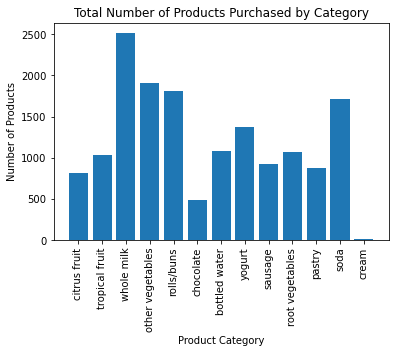

In [200]:
product_sums = new_data.iloc[:, 2:].sum(axis=0)
plt.bar(product_sums.index, product_sums.values)
plt.xticks(rotation=90)
plt.title('Total Number of Products Purchased by Category')
plt.xlabel('Product Category')
plt.ylabel('Number of Products')

plt.show()

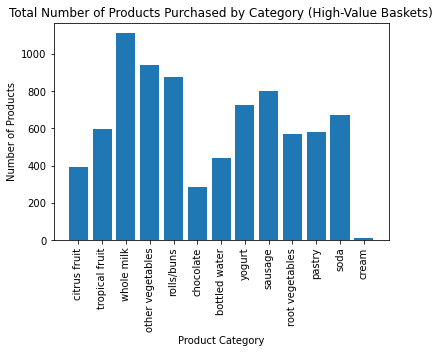

In [201]:
high_value_data = new_data[new_data['basket_value'] == 'high']
product_sums = high_value_data.iloc[:, 2:].sum()

plt.bar(product_sums.index, product_sums.values)
plt.xticks(rotation=90)

plt.title('Total Number of Products Purchased by Category (High-Value Baskets)')
plt.xlabel('Product Category')
plt.ylabel('Number of Products')

plt.show()

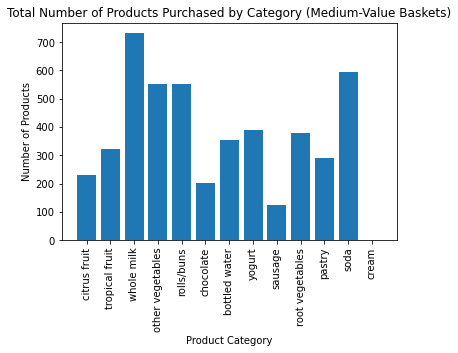

In [202]:
high_value_data = new_data[new_data['basket_value'] == 'medium']
product_sums = high_value_data.iloc[:, 2:].sum()

plt.bar(product_sums.index, product_sums.values)
plt.xticks(rotation=90)

plt.title('Total Number of Products Purchased by Category (Medium-Value Baskets)')
plt.xlabel('Product Category')
plt.ylabel('Number of Products')

plt.show()

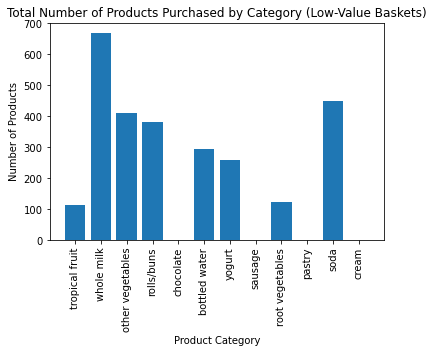

In [203]:
high_value_data = new_data[new_data['basket_value'] == 'low']
product_sums = high_value_data.iloc[:, 3:].sum()

plt.bar(product_sums.index, product_sums.values)
plt.xticks(rotation=90)

plt.title('Total Number of Products Purchased by Category (Low-Value Baskets)')
plt.xlabel('Product Category')
plt.ylabel('Number of Products')

plt.show()

Accorging to plots above, pastry, chocolate and sausage tend to follow basket value (they are chosen relatively often on baskets with high value, their demand gets reduced on medium basket value and they are not chosen at all by low valued baskets), with tropical fruit and root vegetables present similar tendency. This is leading to the conclusion that they are products with high elasticity of demand, meaning that customers tend to avoid purchasing them when they operate on limited budget. On the other hand, whole milk, rolls/buns, other vegetables, bottled water seem to have high and steady demand, which is significantly less affected by basket value, in comparison to products mentioned above. On economics, this behavior is called low elasticity of demand.

In [204]:
sum_per_recency = new_data.groupby('recency_days').sum().iloc[:, 3:]
recency_new = sum_per_recency.iloc[:, 1:]
sum_per_recency['Total'] = recency_new.sum(axis=1)

In [205]:
sum_per_recency

,whole milk,other vegetables,rolls/buns,chocolate,bottled water,yogurt,sausage,root vegetables,pastry,soda,cream,Total
recency_days,,,,,,,,,,,,
1,17,14,19,6,9,10,19,15,0,12,0,104
2,79,32,33,12,20,19,27,17,0,21,0,181
3,131,33,29,10,18,25,28,17,0,24,0,184
4,128,39,27,12,11,23,26,26,0,21,0,185
5,135,27,21,7,5,27,30,15,0,20,0,152
...,...,...,...,...,...,...,...,...,...,...,...,...
72,43,31,34,7,15,32,11,23,100,31,0,284
73,52,38,47,9,22,31,12,15,100,42,0,316
74,54,40,49,6,9,35,16,20,100,55,0,330


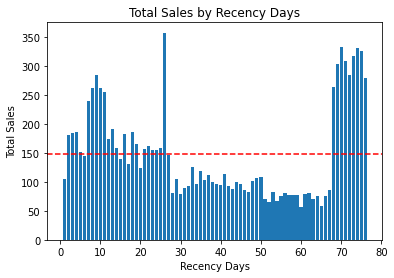

In [206]:
avg_quantity = sum_per_recency['Total'].mean()
fig, ax = plt.subplots()
ax.bar(sum_per_recency.index, sum_per_recency['Total'])
ax.axhline(y=avg_quantity, color='r', linestyle='--')

plt.xlabel('Recency Days')
plt.ylabel('Total Sales')
plt.title('Total Sales by Recency Days')

plt.show()

In the bar plot above, sales per day are represented. For the first 10 days sales are well above average (red line), but fror the next 40 days they drop massively, before they get back up. We could assume that the first ten days are around a bank holiday (e.g. Christmas), when customers tend to purchase more pruducts. 

In [207]:
from apyori import apriori
transacts_w_value = new_data.drop(columns = ['recency_days'], axis = 1)

transacts_wout_value = transacts_w_value.drop(columns = ['basket_value'],axis = 1)

transacts_w_value

,basket_value,citrus fruit,tropical fruit,whole milk,other vegetables,rolls/buns,chocolate,bottled water,yogurt,sausage,root vegetables,pastry,soda,cream
0,low,1,0,0,0,0,0,0,0,0,0,0,0,0
1,medium,0,1,0,0,0,0,0,1,0,0,0,0,0
2,low,0,0,1,0,0,0,0,0,0,0,0,0,0
3,high,0,0,0,0,0,0,0,1,0,0,0,0,0
4,low,0,0,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7531,high,1,0,1,0,0,1,0,0,1,1,0,0,0
7532,medium,0,0,0,0,0,0,0,0,0,0,0,0,0
7533,high,1,0,0,1,1,0,0,1,0,0,0,0,0
7534,medium,0,0,0,0,0,0,1,0,0,0,0,1,0


In [208]:
transacts = [[col for col in transacts_wout_value.columns if row[col] == 1] for idx, row in transacts_wout_value.iterrows()]
one_hot = pd.get_dummies(transacts_w_value['basket_value'])
transacts_w_value = pd.concat([transacts_w_value, one_hot], axis=1)
transacts_w_value.drop('basket_value', axis=1, inplace=True)
transacts_value = [[col for col in transacts_w_value.columns if row[col] == 1] for idx, row in transacts_w_value.iterrows()]
transacts_value

[['citrus fruit', 'low'],
 ['tropical fruit', 'yogurt', 'medium'],
 ['whole milk', 'low'],
 ['yogurt', 'high'],
 ['whole milk', 'other vegetables', 'low'],
 ['whole milk', 'yogurt', 'low'],
 ['rolls/buns', 'low'],
 ['other vegetables', 'rolls/buns', 'medium'],
 ['whole milk', 'low'],
 ['tropical fruit', 'other vegetables', 'chocolate', 'bottled water', 'high'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'bottled water',
  'yogurt',
  'high'],
 ['rolls/buns', 'soda', 'medium'],
 ['tropical fruit', 'low'],
 ['chocolate', 'medium'],
 ['other vegetables', 'low'],
 ['pastry', 'medium'],
 ['whole milk', 'low'],
 ['tropical fruit', 'high'],
 ['tropical fruit',
  'other vegetables',
  'rolls/buns',
  'root vegetables',
  'high'],
 ['bottled water', 'low'],
 ['yogurt', 'low'],
 ['rolls/buns', 'chocolate', 'sausage', 'soda', 'high'],
 ['other vegetables', 'low'],
 ['soda', 'low'],
 ['bottled water', 'yogurt', 'medium'],
 ['other vegetables', 'rolls/buns', 'bottled water', 'medium'],

In [209]:
def inspect(output):

    lhs = []
    rhs = []
    support = []
    confidence = []
    lift = []

    for rule in output:
        for item in rule[2]:
            lhs.append(tuple(item[0]))
            rhs.append(tuple(item[1]))
            support.append(rule[1])
            confidence.append(item[2])
            lift.append(item[3])
            
    return list(zip(lhs, rhs, support, confidence, lift))

rules = list(apriori(transactions = transacts, min_support = 0.01, min_confidence = 0.1, min_lift=1, min_length=2))
output_DataFrame = pd.DataFrame(inspect(rules), columns = ['Left_Hand_Side', 'Right_Hand_Side', 'Support', 'Confidence', 'Lift'])

In [210]:
output_DataFrame = output_DataFrame[output_DataFrame['Left_Hand_Side'].apply(len) > 0]
output_DataFrame = output_DataFrame.dropna(subset=['Left_Hand_Side'])
top_20_wout_value = output_DataFrame.sort_values(by='Confidence', ascending=False).head(20)

In [211]:
top_20_wout_value

,Left_Hand_Side,Right_Hand_Side,Support,Confidence,Lift
255,"(root vegetables, other vegetables, yogurt)","(whole milk,)",0.010218,0.606299,1.818174
101,"(root vegetables, citrus fruit)","(other vegetables,)",0.013535,0.586207,2.321416
150,"(root vegetables, tropical fruit)","(other vegetables,)",0.016056,0.584541,2.314819
225,"(root vegetables, tropical fruit)","(whole milk,)",0.015658,0.570048,1.709464
234,"(root vegetables, yogurt)","(whole milk,)",0.018976,0.562992,1.688304
257,"(root vegetables, yogurt, whole milk)","(other vegetables,)",0.010218,0.538462,2.132342
195,"(root vegetables, rolls/buns)","(whole milk,)",0.016587,0.523013,1.568413
246,"(tropical fruit, yogurt)","(whole milk,)",0.019772,0.517361,1.551466
112,"(root vegetables, citrus fruit)","(whole milk,)",0.011943,0.517241,1.551107
192,"(pastry, yogurt)","(whole milk,)",0.011943,0.517241,1.551107


These 20 transactions above are the ones with the highest confidence rating, without taking into account basket value. We can see that every one of them contain some of the most purchased products, as we found out before, like whole milk, other vegetables and rolls/buns.

In [212]:
rules = list(apriori(transactions = transacts_value, min_support = 0.075, min_confidence = 0.25, min_lift=1, min_length=2))
output_DataFrame = pd.DataFrame(inspect(rules), columns = ['Left_Hand_Side', 'Right_Hand_Side', 'Support', 'Confidence', 'Lift'])
output_DataFrame = output_DataFrame[output_DataFrame['Left_Hand_Side'].apply(len) > 0]
output_DataFrame = output_DataFrame.dropna(subset=['Left_Hand_Side'])
top_20_w_value = output_DataFrame.sort_values(by='Confidence', ascending=False).head(20)

In [213]:
top_20_w_value

,Left_Hand_Side,Right_Hand_Side,Support,Confidence,Lift
12,"(sausage,)","(high,)",0.106290,0.866883,2.662115
7,"(pastry,)","(high,)",0.077362,0.666286,2.046100
15,"(tropical fruit,)","(high,)",0.078954,0.576550,1.770531
10,"(root vegetables,)","(high,)",0.075902,0.533582,1.638580
19,"(yogurt,)","(high,)",0.096338,0.529155,1.624983
6,"(other vegetables,)","(high,)",0.124602,0.493431,1.515281
9,"(rolls/buns,)","(high,)",0.116242,0.484245,1.487072
16,"(high,)","(whole milk,)",0.147558,0.453138,1.358872
17,"(whole milk,)","(high,)",0.147558,0.442499,1.358872
14,"(soda,)","(high,)",0.089172,0.391837,1.203293


These 20 transactions above are the ones with the highest confidence rating, with taking into account basket value. We can see that the majority refers to basket_value, especially to the high basket value. The most expensive product seems to be sausage, because of the high confidence value, between itself and high basket value. 86% of the times it appears on the transaction dataset, transaction's basket value is high.

In [214]:
kmeans = KMeans(n_clusters=5)
cols_to_cluster = ['recency_days', 'basket_value']
X = new_data_num_value[cols_to_cluster].values
kmeans.fit(X)
new_data_num_value['cluster'] = kmeans.labels_

D:\theo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-means clustering without scaling attributes is a bad practise, because there is bias towards the attribute with the highest value range. So, in the plot below we see a clustering highly biased towards Recency days, due to the difference of the range. This leades to a poor clustering, which has pretty much split the dataset to 5 clusters, each one containing roughly 15 days of transactions.

According to rules above, we can conclude that whole milk is the most demanded product of the transactions set, participating to the majority of the rules. Sausage, pastry, tropical fruit and root vegatables, products which seemed to have high elasticity on demand on the prior analysis conducted are quite popular among baskets with high value, backing up our former assumption.

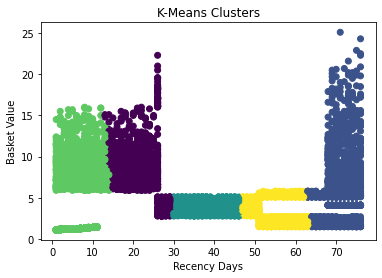

In [215]:
plt.scatter(new_data_num_value['recency_days'], new_data_num_value['basket_value'], c=kmeans.labels_)
plt.title('K-Means Clusters')
plt.xlabel('Recency Days')
plt.ylabel('Basket Value')
plt.show()

In [216]:
from sklearn.metrics import silhouette_score

# calculate the silhouette score for the clusters
silhouette_avg = silhouette_score(X, kmeans.labels_)

print(f"The silhouette score for the clusters is {silhouette_avg:.3f}")

The silhouette score for the clusters is 0.530


In [217]:
cluster_std = kmeans.cluster_centers_.std(axis=0)

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

cluster_centers_mean = np.mean(cluster_centers, axis=0)

# Print the results
print("Cluster Standard Deviation:\n", cluster_std)
print("\nCluster Centers:\n", cluster_centers_mean)

Cluster Standard Deviation:
 [22.73551897  1.69576367]

Cluster Centers:
 [38.55128911  5.00521979]


In the clustering below, attributes have been scaled between 0 and 1, creating much more meaningful and helpful clusters. Cluster 0 contains transactions completed early on (high recency day) with low basket value and it's the most populated one, cluster 4 contains recent transactions with low basket value, cluster 3 refers to transactions happened between recency day 52 and 25 (roughly), regardless basket value, even though it looks like they got clustered together, because they have similar basket values. Cluster 2 contains transactions with high value, completed early on and finally cluster 1 contains high valued transactions, happened recently. Cluster 2 seems to be the most interesting when it comes to analysis, since it contains expensive transactions that happened a long time ago.

D:\theo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


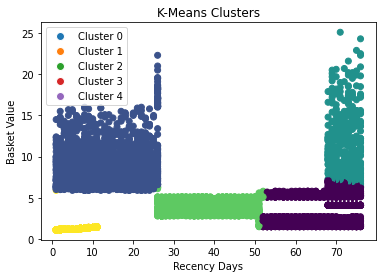

In [218]:
np.random.seed(42)
from sklearn.preprocessing import MinMaxScaler
kmeans_standardized = KMeans(n_clusters=5)
scaler = MinMaxScaler()

X_standardized = scaler.fit_transform(X)
kmeans_standardized.fit(X_standardized)
new_data_num_value['cluster'] = kmeans_standardized.labels_
labels = kmeans_standardized.labels_

plt.scatter(new_data_num_value['recency_days'], new_data_num_value['basket_value'], c=kmeans_standardized.labels_)
plt.title('K-Means Clusters')
plt.xlabel('Recency Days')
plt.ylabel('Basket Value')

cmap = plt.cm.get_cmap('tab10')
unique_labels = set(kmeans_standardized.labels_)
label_colors = [cmap(label) for label in unique_labels]
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8, label=f'Cluster {label}') 
                   for label, color in zip(unique_labels, label_colors)]
plt.legend(handles=legend_elements)

plt.show()
cluster_population = pd.Series(labels).value_counts()

In [219]:
cluster_population

0    2204
1    1916
3    1877
4    1039
2     500
dtype: int64

In [220]:
new_data_num_value['cluster'] = labels

new_data_num_value

,id,basket_value,recency_days,citrus fruit,tropical fruit,whole milk,other vegetables,rolls/buns,chocolate,bottled water,yogurt,sausage,root vegetables,pastry,soda,cream,cluster
0,1,1.1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,4
1,2,3.6,31,0,1,0,0,0,0,0,1,0,0,0,0,0,3
2,3,1.2,7,0,0,1,0,0,0,0,0,0,0,0,0,0,4
3,4,6.6,7,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,5,2.5,66,0,0,1,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7531,9831,17.0,26,1,0,1,0,0,1,0,0,1,1,0,0,0,1
7532,9832,3.1,28,0,0,0,0,0,0,0,0,0,0,0,0,0,3
7533,9833,6.1,3,1,0,0,1,1,0,0,1,0,0,0,0,0,1
7534,9834,3.1,31,0,0,0,0,0,0,1,0,0,0,0,1,0,3


In [221]:
from sklearn.metrics import silhouette_score

# calculate the silhouette score for the clusters
silhouette_avg = silhouette_score(X_standardized, kmeans_standardized.labels_)

print(f"The silhouette score for the clusters is {silhouette_avg:.3f}")

The silhouette score for the clusters is 0.542


In [222]:
cluster_labels = kmeans_standardized.labels_
cluster_centers_standardized = kmeans_standardized.cluster_centers_

X_df = pd.DataFrame(X_standardized, columns=['recency_days', 'basket_value'])
X_df['cluster'] = cluster_labels
cluster_std_standardized = X_df.groupby('cluster').std()

# Return the cluster centers and standard deviation to the original scale
cluster_centers_original = scaler.inverse_transform(cluster_centers_standardized)
cluster_std_original = scaler.inverse_transform(cluster_std_standardized)

# Make predictions on the original data
labels = kmeans.predict(X)

In [223]:
cluster_centers = cluster_centers_original
cluster_centers

array([[65.3315168 ,  3.03260672],
       [13.61899791,  8.91351775],
       [72.22908367, 11.3687251 ],
       [38.4741609 ,  3.82322856],
       [ 6.29355149,  1.26689124]])

In [224]:
std_dev_X = np.std(cluster_centers[:, 0])
std_dev_Y = np.std(cluster_centers[:, 1])

std_dev = [std_dev_X, std_dev_Y]
std_dev

[26.501037136683337, 3.8144212040645487]

In [225]:
new_df = new_data_num_value.iloc[:, 3:].copy()

In [226]:
new_df

,citrus fruit,tropical fruit,whole milk,other vegetables,rolls/buns,chocolate,bottled water,yogurt,sausage,root vegetables,pastry,soda,cream,cluster
0,1,0,0,0,0,0,0,0,0,0,0,0,0,4
1,0,1,0,0,0,0,0,1,0,0,0,0,0,3
2,0,0,1,0,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,0,0,1,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7531,1,0,1,0,0,1,0,0,1,1,0,0,0,1
7532,0,0,0,0,0,0,0,0,0,0,0,0,0,3
7533,1,0,0,1,1,0,0,1,0,0,0,0,0,1
7534,0,0,0,0,0,0,1,0,0,0,0,1,0,3


In [227]:
transacts = [[col for col in new_df.columns if row[col] == 1] for idx, row in new_df.iterrows()]
one_hot = pd.get_dummies(new_df['cluster'])
new_df = pd.concat([new_df, one_hot], axis=1)
new_df.drop('cluster', axis=1, inplace=True)
new_df

,citrus fruit,tropical fruit,whole milk,other vegetables,rolls/buns,chocolate,bottled water,yogurt,sausage,root vegetables,pastry,soda,cream,0,1,2,3,4
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7531,1,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0
7532,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7533,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0
7534,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [228]:
new_transacts = [[col for col in new_df.columns if row[col] == 1] for idx, row in new_df.iterrows()]

In [229]:
new_transacts = [[str(item) for item in transaction] for transaction in new_transacts]
rules = list(apriori(transactions = new_transacts, min_support = 0.05, min_confidence = 0.1, min_lift=1, min_length=2))
output_DataFrame = pd.DataFrame(inspect(rules), columns = ['Left_Hand_Side', 'Right_Hand_Side', 'Support', 'Confidence', 'Lift'])
output_DataFrame = output_DataFrame[output_DataFrame['Left_Hand_Side'].apply(len) > 0]
output_DataFrame = output_DataFrame.dropna(subset=['Left_Hand_Side'])
top_20_new = output_DataFrame.sort_values(by='Confidence', ascending=False).head(20)
top_20_new

,Left_Hand_Side,Right_Hand_Side,Support,Confidence,Lift
34,"(2,)","(pastry,)",0.066348,1.000000,8.612571
24,"(sausage,)","(1,)",0.090764,0.740260,2.911585
35,"(pastry,)","(2,)",0.066348,0.571429,8.612571
28,"(tropical fruit,)","(1,)",0.063296,0.462209,1.817959
22,"(root vegetables,)","(1,)",0.064225,0.451493,1.775808
48,"(root vegetables,)","(whole milk,)",0.063827,0.448694,1.345546
30,"(1,)","(whole milk,)",0.113588,0.446764,1.339759
43,"(root vegetables,)","(other vegetables,)",0.061837,0.434701,1.721445
40,"(4,)","(whole milk,)",0.058917,0.427334,1.281492
33,"(yogurt,)","(1,)",0.075902,0.416910,1.639786


According to rules above, Cluster 2, the one that contains expensive transactions that used to occur, contains pastry on every transaction. So, we can assume that the demand for pastry has fallen off, since the 57% of the transactions where it appears, belong to Cluster 2. 

In [231]:
transacts_w_value['cluster'] = cluster_labels
new_df_values = transacts_w_value

In [232]:
transacts = [[col for col in new_df_values.columns if row[col] == 1] for idx, row in new_df_values.iterrows()]
one_hot = pd.get_dummies(new_df_values['cluster'])
new_df_values = pd.concat([new_df_values, one_hot], axis=1)
new_df_values.drop('cluster', axis=1, inplace=True)
new_df_values

,citrus fruit,tropical fruit,whole milk,other vegetables,rolls/buns,chocolate,bottled water,yogurt,sausage,root vegetables,...,soda,cream,high,low,medium,0,1,2,3,4
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
4,0,0,1,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7531,1,0,1,0,0,1,0,0,1,1,...,0,0,1,0,0,0,1,0,0,0
7532,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
7533,1,0,0,1,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
7534,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [233]:
new_transacts_values = [[col for col in new_df_values.columns if row[col] == 1] for idx, row in new_df_values.iterrows()]

In [234]:
new_transacts_values = [[str(item) for item in transaction] for transaction in new_transacts_values]
rules = list(apriori(transactions = new_transacts_values, min_support = 0.05, min_confidence = 0.1, min_lift=1, min_length=2))
output_DataFrame = pd.DataFrame(inspect(rules), columns = ['Left_Hand_Side', 'Right_Hand_Side', 'Support', 'Confidence', 'Lift'])
output_DataFrame = output_DataFrame[output_DataFrame['Left_Hand_Side'].apply(len) > 0]
output_DataFrame = output_DataFrame.dropna(subset=['Left_Hand_Side'])
top_20_new_values = output_DataFrame.sort_values(by='Confidence', ascending=False).head(20)
top_20_new_values

,Left_Hand_Side,Right_Hand_Side,Support,Confidence,Lift
43,"(2,)","(high,)",0.066348,1.000000,3.070905
45,"(2,)","(pastry,)",0.066348,1.000000,8.612571
156,"(2,)","(pastry, high)",0.066348,1.000000,12.926244
159,"(2, high)","(pastry,)",0.066348,1.000000,8.612571
160,"(2, pastry)","(high,)",0.066348,1.000000,3.070905
55,"(4,)","(low,)",0.137739,0.999038,2.927196
186,"(4, whole milk)","(low,)",0.058785,0.997748,2.923416
164,"(3, other vegetables)","(medium,)",0.058652,0.991031,2.975463
180,"(3, whole milk)","(medium,)",0.075902,0.989619,2.971224
129,"(sausage, 1)","(high,)",0.089703,0.988304,3.034988


In the rule set above, we can see that Cluster 2 is completely consisted by transactions with high value and contain pastry. Various relations that were noticed during clustering, like the correlation between each cluster and basket value, is shown as well.